## **Spotify Wrapped: Detailed Overview.**


---



**Import the required libraries and modules.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snsv

import textwrap
from itertools import product

#### **Load the files.**

The data must be placed in the ```/spotify_data``` in order to be loaded.

In [11]:
import os

# Example assuming the folder is in the same directory as your notebook:
json_directory = "spotify_data" 

# Get a list of all JSON files in the directory that start with "Streaming_History_Audio_2025_"
json_files = [os.path.join(json_directory, f) 
              for f in os.listdir(json_directory) 
              if f.startswith("Streaming_History_Audio_2025_") and f.endswith(".json")]

# Read each JSON file into a DataFrame and concatenate them
df = pd.concat((pd.read_json(f) for f in json_files), ignore_index=True)

#### **Read the data.**

In [12]:
print("\n#### First 5 rows of the DataFrame: ####\n")
display(df.head())


#### First 5 rows of the DataFrame: ####



,ts,platform,ms_played,conn_country,ip_addr,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,...,audiobook_uri,audiobook_chapter_uri,audiobook_chapter_title,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2025-01-06T23:56:34Z,android,4996,AR,2802:8012:536c:5100:8c54:5f92:a320:6b24,"Luv (sic) 12"" Remix",Nujabes,Luv(sic) Hexalogy,spotify:track:7GgxAb6nyVReB3FFxtQWkV,NaN,...,NaN,NaN,NaN,clickrow,endplay,True,True,False,1736207789,False
1,2025-01-06T23:56:44Z,android,9073,AR,2802:8012:536c:5100:8c54:5f92:a320:6b24,Luv (sic) pt6 Uyama Hiroto Remix Instrumentals,Nujabes,Luv(sic) Hexalogy,spotify:track:6bjYPIzpMjFhlYbgPhi8AP,NaN,...,NaN,NaN,NaN,clickrow,endplay,True,True,False,1736207794,False
2,2025-01-06T23:57:25Z,android,40913,AR,2802:8012:536c:5100:8c54:5f92:a320:6b24,Luv (sic) pt6 Uyama Hiroto Remix,Nujabes,Luv(sic) Hexalogy,spotify:track:16wGHOPaWoat5rkAZkixxk,NaN,...,NaN,NaN,NaN,clickrow,endplay,True,True,False,1736207804,False
3,2025-01-06T23:57:26Z,android,1029,AR,2802:8012:536c:5100:8c54:5f92:a320:6b24,Jazz presso,re:plus,Prayer,spotify:track:1HrS8TQFRwpo0Y7Xg5JqFv,NaN,...,NaN,NaN,NaN,clickrow,endplay,False,True,False,1736207845,False
4,2025-01-06T23:57:41Z,android,14673,AR,2802:8012:536c:5100:8c54:5f92:a320:6b24,Migratory birds,re:plus,Prayer,spotify:track:0X58uodvlbESqAMKLnV2A7,NaN,...,NaN,NaN,NaN,clickrow,endplay,False,True,False,1736207846,False


The following table explains the technical fields required for this analysis:

| Technical field | Contains |
| :--- | :--- |
| **ts** | This field is a timestamp indicating when the track stopped playing in UTC (Coordinated Universal Time). Te order is year, month and day followed by a timestamp in military time |
| **ms_played** | This field is the number of milliseconds the stream was played. |
| **master_metadata_track_name** | This field is the name of the track. |
| **master_metadata_album_artist_name** | This field is the name of the artist, band or podcast. |
| **master_metadata_album_album_name** | This field is the name of the album of the track. |

####  **Select And Rename The Columns Required For This Analysis.**

In [13]:
df = df[["ts","ms_played", "master_metadata_track_name", "master_metadata_album_artist_name", "master_metadata_album_album_name"]]
df.rename(columns={
    "ts": "endTime",
    "ms_played": "msPlayed",
    "master_metadata_track_name": "trackName",
    "master_metadata_album_artist_name": "artistName",
    "master_metadata_album_album_name": "albumName"
    }, inplace=True)


print("\n#### Columns required for this analysis: ####\n")
display(df.head())


#### Columns required for this analysis: ####



,endTime,msPlayed,trackName,artistName,albumName
0,2025-01-06T23:56:34Z,4996,"Luv (sic) 12"" Remix",Nujabes,Luv(sic) Hexalogy
1,2025-01-06T23:56:44Z,9073,Luv (sic) pt6 Uyama Hiroto Remix Instrumentals,Nujabes,Luv(sic) Hexalogy
2,2025-01-06T23:57:25Z,40913,Luv (sic) pt6 Uyama Hiroto Remix,Nujabes,Luv(sic) Hexalogy
3,2025-01-06T23:57:26Z,1029,Jazz presso,re:plus,Prayer
4,2025-01-06T23:57:41Z,14673,Migratory birds,re:plus,Prayer


#### **Check The Data Types Off The Columns.**

In [14]:
display(df.dtypes)

endTime       object
msPlayed       int64
trackName     object
artistName    object
albumName     object
dtype: object

#### **Convert The `endTime` To a Datetime Format And Add Two New Columns: `month` and `week`.**

In [15]:
df['endTime'] = pd.to_datetime(df['endTime'])
df['month'] = df['endTime'].dt.month
df['week'] = df['endTime'].dt.to_period('W')

print("\n#### Final DataFrame:####\n")
display(df.head())

C:\Users\G3rrido\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,



#### Final DataFrame:####



,endTime,msPlayed,trackName,artistName,albumName,month,week
0,2025-01-06 23:56:34+00:00,4996,"Luv (sic) 12"" Remix",Nujabes,Luv(sic) Hexalogy,1,2025-01-06/2025-01-12
1,2025-01-06 23:56:44+00:00,9073,Luv (sic) pt6 Uyama Hiroto Remix Instrumentals,Nujabes,Luv(sic) Hexalogy,1,2025-01-06/2025-01-12
2,2025-01-06 23:57:25+00:00,40913,Luv (sic) pt6 Uyama Hiroto Remix,Nujabes,Luv(sic) Hexalogy,1,2025-01-06/2025-01-12
3,2025-01-06 23:57:26+00:00,1029,Jazz presso,re:plus,Prayer,1,2025-01-06/2025-01-12
4,2025-01-06 23:57:41+00:00,14673,Migratory birds,re:plus,Prayer,1,2025-01-06/2025-01-12


#### **What Time Frame Does The Information Collected From Spotify Refer To?**

In [16]:
first_date = df['endTime'].dt.date.iloc[0]
last_date = df['endTime'].dt.date.iloc[-1]
print(f"The information obtained from Spotify pertains to the period from {first_date}, to {last_date}.")

The information obtained from Spotify pertains to the period from 2025-01-06, to 2025-09-20.


#### **How Much Data Does Spotify Collect Every Month?**

In [17]:
df_agg = df.groupby("month")
agg_artist_monthly = df_agg[['artistName','trackName']].nunique()

display(agg_artist_monthly)

,artistName,trackName
month,,
1,860,2714
2,916,2515
3,1410,4098
4,864,2435
5,1556,3683
6,1553,3425
7,2147,4692
8,1211,2631
9,366,815


Understanding the time period covered and the amount of data collected by Spotify, we can proceed with the analysis.


#### **The Most Listened-to Artists Overall (measured in msPlayed).**

In [18]:
top_artists = df.groupby(['artistName']).agg(msPlayed=('msPlayed', 'sum')).reset_index()

print("\n#### Top most-listened artists overall: ####\n")
top_artists = top_artists.sort_values(ascending=False, by="msPlayed").reset_index(drop=True).head(5)
display(top_artists)


#### Top most-listened artists overall: ####



,artistName,msPlayed
0,The Beatles,328495363
1,Thee Michelle Gun Elephant,91063035
2,Patricio Rey y sus Redonditos de Ricota,83118557
3,Radiohead,56969054
4,The Smiths,55725821


#### **📈 Visualization: Most-Listened Artists Overall**

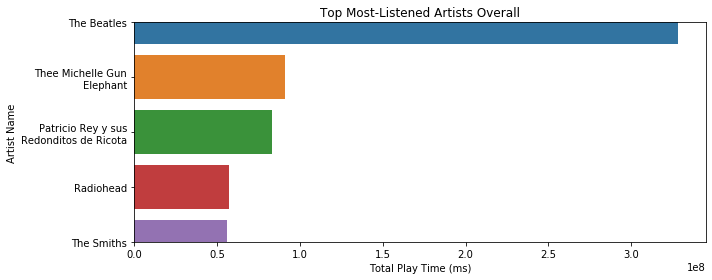

In [19]:
## Graph of the Most-Listened Artists ##
plt.figure(figsize=(10, 4))
ax = snsv.barplot(x='msPlayed', y='artistName', data=top_artists)
plt.title('Top Most-Listened Artists Overall')
plt.xlabel('Total Play Time (ms)')
plt.ylabel('Artist Name')

# Wrap the y-axis labels
wrapped_labels = [textwrap.fill(label.get_text(), width=20) for label in ax.get_yticklabels()]
ax.set_yticks(ax.get_yticks()) # Set the ticks first
ax.set_yticklabels(wrapped_labels)

plt.tight_layout()
plt.show()

#### **Percentage Of Time Spent Listening To The Top Artists**

In [20]:
total_msPlayed = df['msPlayed'].sum()

pct_time_top_artists = top_artists

pct_time_top_artists['percentage_of_time_listening'] = round((top_artists["msPlayed"] / total_msPlayed) * 100, 2)

print("\n#### Percentage of time spent listening to the top artists: ####\n")
display(pct_time_top_artists)


#### Percentage of time spent listening to the top artists: ####



,artistName,msPlayed,percentage_of_time_listening
0,The Beatles,328495363,13.29
1,Thee Michelle Gun Elephant,91063035,3.68
2,Patricio Rey y sus Redonditos de Ricota,83118557,3.36
3,Radiohead,56969054,2.30
4,The Smiths,55725821,2.25


#### **The Most Listened-to Tracks Overall (measured in msPlayed).**

In [21]:
top_tracks = df.groupby(['artistName',"trackName"]).agg(msPlayed=('msPlayed', 'sum')).reset_index()
top_tracks = top_tracks.sort_values(ascending=False, by="msPlayed").reset_index(drop=True).head(5)

print("\n#### Top most-listened tracks overall: ####\n")
display(top_tracks)


#### Top most-listened tracks overall: ####



,artistName,trackName,msPlayed
0,The Smiths,This Charming Man - 2011 Remaster,11196482
1,Soda Stereo,Sueles Dejarme Solo - Remasterizado 2007,9782937
2,Oasis,Supersonic - Remastered,9764319
3,Los Fundamentalistas del Aire Acondicionado,Mi Genio Amor - En Vivo,9449722
4,The Beatles,Hey Jude - Remastered 2015,8385826


#### **📈 Visualization: Most-Listened Tracks Overall**

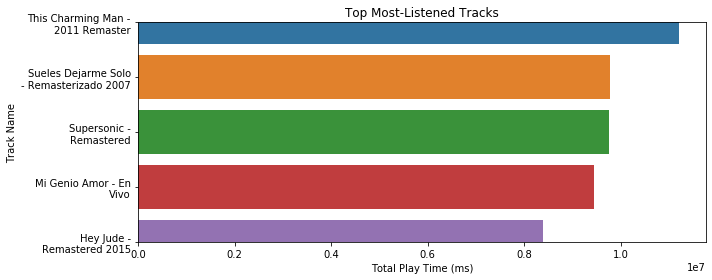

In [22]:
plt.figure(figsize=(10, 4))
ax = snsv.barplot(x='msPlayed', y='trackName', data=top_tracks)
plt.title('Top Most-Listened Tracks')
plt.xlabel('Total Play Time (ms)')
plt.ylabel('Track Name')

# Wrap the y-axis labels
wrapped_labels = [textwrap.fill(label.get_text(), width=20) for label in ax.get_yticklabels()]
ax.set_yticks(ax.get_yticks()) # Set the ticks first
ax.set_yticklabels(wrapped_labels)

plt.tight_layout()
plt.show()

#### **Percentage Of Time Spent Listening To The Top Tracks**

In [23]:
total_msPlayed = df['msPlayed'].sum()

pct_time_top_tracks = top_tracks

pct_time_top_tracks['percentage_of_time_listening'] = round((top_tracks["msPlayed"] / total_msPlayed) * 100, 2)

print("\n#### Percentage of time spent listening to the top tracks: ####\n")
display(pct_time_top_tracks[['artistName',"trackName","msPlayed","percentage_of_time_listening"]])


#### Percentage of time spent listening to the top tracks: ####



,artistName,trackName,msPlayed,percentage_of_time_listening
0,The Smiths,This Charming Man - 2011 Remaster,11196482,0.45
1,Soda Stereo,Sueles Dejarme Solo - Remasterizado 2007,9782937,0.40
2,Oasis,Supersonic - Remastered,9764319,0.40
3,Los Fundamentalistas del Aire Acondicionado,Mi Genio Amor - En Vivo,9449722,0.38
4,The Beatles,Hey Jude - Remastered 2015,8385826,0.34


### **Performance Of The Most Listened-to Artists Monthly.**

To accomplish this, you need to create a grid that includes all top artists for each month. Then, join this grid with the `monthly_charts` data. This will ensure that every top artist has a row for every month, with `msPlayed` set to 0 for those who do not appear in the original monthly data.

In [24]:
# 1. Calculate the total listening time for all artists and get the top
top_artists_list = df.groupby('artistName')['msPlayed'].sum().nlargest(5).index

# 2. Get a list of all unique months
all_months = df['month'].unique().tolist()

# 3. Create a DataFrame with all combinations of top artists and months
full_grid = pd.DataFrame(product(all_months, top_artists_list), columns=['month', 'artistName'])

# 2. Filter the monthly charts using this list of top artists
monthly_charts = df.groupby(['month', 'artistName']).agg(msPlayed=('msPlayed', 'sum')).reset_index()

# 5. Left merge the full grid with the monthly data
top_artists_recorded = pd.merge(full_grid, monthly_charts, on=['month', 'artistName'], how='left')

# 6. Fill NaN values with 0
top_artists_recorded['msPlayed'] = top_artists_recorded['msPlayed'].fillna(0)

# 7. Sort the result for better visualization
top_artists_recorded = top_artists_recorded.sort_values(by=['month', 'msPlayed'], ascending=[True, False]).reset_index(drop=True)

print("\n#### Performance of the top-most listened artists overall in the first month: ####\n")
display(top_artists_recorded.head())


#### Performance of the top-most listened artists overall in the first month: ####



,month,artistName,msPlayed
0,1,Patricio Rey y sus Redonditos de Ricota,32353675
1,1,Thee Michelle Gun Elephant,20961558
2,1,The Smiths,4788639
3,1,The Beatles,2759773
4,1,Radiohead,944091


#### **📈 Visualization: Performance Of The Most Listened-to Artists Monthly.**

In [37]:
def run_graph(data,hue_data,data_title):
  """
  Create a graph showing the performance of the most listened-to content monthly/weekly.
  """
  # Plotting the data
  plt.figure(figsize=(12, 4)) # Further increased figure size
  ax = snsv.lineplot(data=data, x='sequential_month', y='msPlayed', marker='o', hue=hue_data, linewidth=1, markersize=3)
  plt.title(data_title)
  plt.xlabel('Month')
  plt.ylabel('MsPlayed')

  # Set x-axis ticks to be integers
  plt.xticks(sorted(data['sequential_month'].unique()))

  plt.xticks(rotation=45, ha='right') # Ensure x-axis labels are aligned correctly
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Keep legend outside the plot

  # Wrap the y-axis labels
  wrapped_labels = [textwrap.fill(label.get_text(), width=20) for label in ax.get_yticklabels()]
  ax.set_yticks(ax.get_yticks()) # Set the ticks first
  ax.set_yticklabels(wrapped_labels)
  ax.set_ylim(bottom=0)

  plt.tight_layout()
  plt.show()

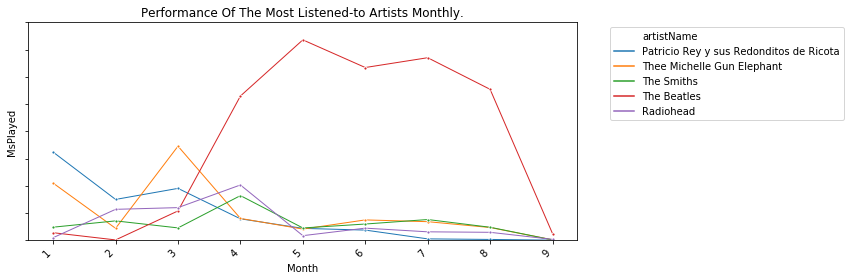

In [38]:
## Graph of the Most-Listened Artists per month ##

month_numbers_list = []
# Create pairs of (Original Month String, Sequential Number)
for month, i in zip(all_months, range(1, len(all_months) + 1)):  month_numbers_list.append([month, i])

month_to_number_map = dict(month_numbers_list)

top_artists_recorded['sequential_month'] = top_artists_recorded['month'].map(month_to_number_map)

run_graph(top_artists_recorded, 'artistName', 'Performance Of The Most Listened-to Artists Monthly.')

### **Performance Of The Most Listened-to Tracks Monthly.**

In [27]:
# 1. Calculate the total listening time for all tracks and get the top
top_tracks_list = df.groupby(['artistName', "trackName"])['msPlayed'].sum().nlargest(5).index

# 2. Get a list of all unique months
all_months = df['month'].unique().tolist()

# 3. Create a DataFrame with all combinations of top tracks and months
full_data = []
for month in all_months:
    for track_name, artist_name in top_tracks_list:
        full_data.append((month, track_name, artist_name))

full_grid = pd.DataFrame(full_data, columns=['month', 'artistName', "trackName"])

# 4. Calculate the monthly charts
monthly_charts = df.groupby(['month', 'artistName', "trackName"]).agg(msPlayed=('msPlayed', 'sum')).reset_index()

# 5. Left merge the full grid with the monthly data
top_tracks_recorded = pd.merge(full_grid, monthly_charts, on=['month', 'artistName', "trackName"], how='left')

# 6. Fill NaN values with 0
top_tracks_recorded['msPlayed'] = top_tracks_recorded['msPlayed'].fillna(0)

# 7. Sort the result for better visualization
top_tracks_recorded = top_tracks_recorded.sort_values(by=['month', 'msPlayed', "trackName"], ascending=[True, False, True]).reset_index(drop=True)

print("\n#### Performance of the top-most listened tracks overall in the first month: ####\n")
display(top_tracks_recorded.head())


#### Performance of the top-most listened tracks overall in the first month: ####



,month,artistName,trackName,msPlayed
0,1,The Smiths,This Charming Man - 2011 Remaster,1974704.0
1,1,Los Fundamentalistas del Aire Acondicionado,Mi Genio Amor - En Vivo,1767156.0
2,1,Soda Stereo,Sueles Dejarme Solo - Remasterizado 2007,1632592.0
3,1,Oasis,Supersonic - Remastered,1566011.0
4,1,The Beatles,Hey Jude - Remastered 2015,8936.0


#### **📈 Visualization: Performance Of The Most Listened-to Tracks Monthly.**

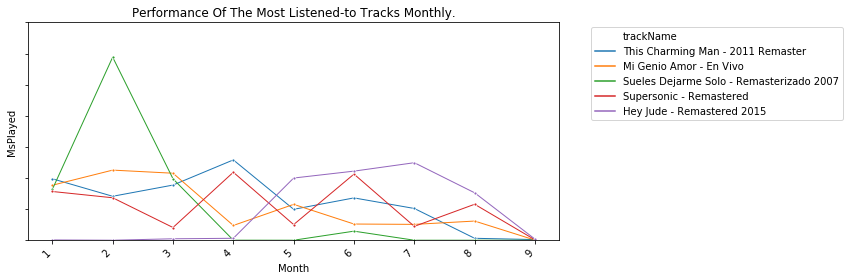

In [39]:
month_numbers_list = []
# Create pairs of (Original Month String, Sequential Number)
for month, i in zip(all_months, range(1, len(all_months) + 1)):  month_numbers_list.append([month, i])

month_to_number_map = dict(month_numbers_list)

top_tracks_recorded['sequential_month'] = top_tracks_recorded['month'].map(month_to_number_map)

run_graph(top_tracks_recorded, "trackName", 'Performance Of The Most Listened-to Tracks Monthly.')



#### **What Were The Top Artists For Each Week?**

In [29]:
# Group by week and artist to get total count per artist per week
agg_artists_weekly = df.groupby(['week', 'artistName']).agg(msPlayed=('msPlayed', 'sum')).reset_index()

# Find the top artists by total count for each week
top_artists_per_week = agg_artists_weekly.groupby('week', group_keys=False).apply(lambda x: x.nlargest(10, 'msPlayed')).reset_index(drop=True)

# for week, group in top_artists_per_week.groupby('week'):
#     print(f"\n#### Top most-listened artists in week {week}: ####\n")
#     print(group)

#### **How Many Times The Most Listened-to Artists Appeared In The Top Weekly Lists?**

In [30]:
top_artists_in_weekly_charts = top_artists_per_week[top_artists_per_week['artistName'].isin(top_artists['artistName'])]
top_artists_in_weekly_charts= top_artists_in_weekly_charts.groupby('artistName').size().to_frame('count').sort_values(by="count", ascending=False).reset_index()

total_weeks = len(df['week'].unique())
top_artists_in_weekly_charts['percentage_of_weeks_in_top'] = round((top_artists_in_weekly_charts["count"] / total_weeks) * 100, 2)

print("\n#### Times the most listened-to artists appeared in the top weekly lists: ####\n")
display(top_artists_in_weekly_charts)


#### Times the most listened-to artists appeared in the top weekly lists: ####



,artistName,count,percentage_of_weeks_in_top
0,The Beatles,25,67.57
1,Thee Michelle Gun Elephant,21,56.76
2,The Smiths,20,54.05
3,Patricio Rey y sus Redonditos de Ricota,10,27.03
4,Radiohead,10,27.03


#### **Who Were The Most Listened-To Artists On The Weekly Charts?**

In [31]:
top_artists_from_weekly_charts = top_artists_per_week.groupby(['artistName',]).size().to_frame('count').sort_values(by="count", ascending=False).reset_index()
top_artists_from_weekly_charts = top_artists_from_weekly_charts.nlargest(5, 'count').reset_index(drop=True)

print("\n#### The most listened-to artists on the weekly charts: ####\n")
display(top_artists_from_weekly_charts)


#### The most listened-to artists on the weekly charts: ####



,artistName,count
0,The Beatles,25
1,Thee Michelle Gun Elephant,21
2,The Smiths,20
3,David Bowie,15
4,John Lennon,13


#### **Differences Between The Top Artists By Listening Time and Weekly Charts.**

In [32]:
# Identify Entrants and Exits

# Artists that EXIT: Were in the Top by Listening Time, but fell out after the consistency weekly.
artists_exit = list(set(top_artists['artistName']) - set(top_artists_from_weekly_charts['artistName']))

# Artists that ENTER: Were outside the Top by Listening Time, but were boosted into the Top by consistency weekly.
artists_enter = list(set(top_artists_from_weekly_charts['artistName']) - set(top_artists['artistName']))

print(f"Artists that EXITED (Penalized for Weekly Volatility): {artists_exit}")
print(f"Artists that ENTERED (Rewarded for Weekly Consistency): {artists_enter}")

Artists that EXITED (Penalized for Weekly Volatility): ['Radiohead', 'Patricio Rey y sus Redonditos de Ricota']
Artists that ENTERED (Rewarded for Weekly Consistency): ['John Lennon', 'David Bowie']


#### **What Were The Top Tracks For Each Week?**

In [33]:
# Group by week and track to get total count per week
agg_tracks_weekly = df.groupby(['week', 'artistName',"trackName"]).agg(msPlayed=('msPlayed', 'sum')).reset_index()

# Find the top tracks by total count for each week
top_tracks_per_week = agg_tracks_weekly.groupby('week', group_keys=False).apply(lambda x: x.nlargest(10, 'msPlayed')).reset_index(drop=True)

# for week, group in top_tracks_per_week.groupby('week'):
#     print(f"\n#### Top most-listened tracks in week {week}: ####\n")
#     print(group)

#### **How Many Times The Most Listened-to Tracks Appeared In The Top Weekly Lists?**

In [34]:
top_tracks['combined_key'] = list(zip(top_tracks['artistName'], top_tracks['trackName']))
top_tracks_per_week['combined_key'] = list(zip(top_tracks_per_week['artistName'], top_tracks_per_week['trackName']))

top_tracks_in_weekly_charts = top_tracks_per_week[top_tracks_per_week['combined_key'].isin(top_tracks['combined_key'])]

top_tracks_in_weekly_charts = top_tracks_in_weekly_charts.groupby(['artistName',"trackName"]).size().to_frame('count').sort_values(by="count", ascending=False).reset_index()

total_weeks = len(df['week'].unique())
top_tracks_in_weekly_charts['percentage_of_weeks_in_top'] = round((top_tracks_in_weekly_charts["count"] / total_weeks) * 100, 2)

print("\n#### Times the most listened-to tracks appeared in the top weekly lists?: ####\n")
display(top_tracks_in_weekly_charts)


#### Times the most listened-to tracks appeared in the top weekly lists?: ####



,artistName,trackName,count,percentage_of_weeks_in_top
0,The Beatles,Hey Jude - Remastered 2015,6,16.22
1,Oasis,Supersonic - Remastered,4,10.81
2,The Smiths,This Charming Man - 2011 Remaster,4,10.81
3,Soda Stereo,Sueles Dejarme Solo - Remasterizado 2007,3,8.11
4,Los Fundamentalistas del Aire Acondicionado,Mi Genio Amor - En Vivo,2,5.41


#### **Who Were The Most Listened-To Tracks On The Weekly Charts?**

In [35]:
top_tracks_from_weekly_charts = top_tracks_per_week.groupby(['artistName',"trackName"]).size().to_frame('count').sort_values(by="count", ascending=False).reset_index()
top_tracks_from_weekly_charts = top_tracks_from_weekly_charts.nlargest(5, 'count').reset_index(drop=True)

print("\n#### The most listened-to tracks on the weekly charts: ####\n")
display(top_tracks_from_weekly_charts)


#### The most listened-to tracks on the weekly charts: ####



,artistName,trackName,count
0,The Beatles,Hey Jude - Remastered 2015,6
1,The Beatles,Come Together - 2019 Mix,5
2,The Beatles,One After 909 - 2021 Mix,4
3,Nina Simone,Sinnerman,4
4,The Smiths,This Charming Man - 2011 Remaster,4


#### **Differences Between The Top Tracks By Listening Time and Weekly Charts.**

In [36]:
top_tracks_from_weekly_charts_copy = top_tracks_from_weekly_charts.copy()
top_tracks_copy = top_tracks.copy()

top_tracks_copy["combined_key"] = list(zip(top_tracks['artistName'], top_tracks['trackName']))
top_tracks_from_weekly_charts_copy["combined_key"] = list(zip(top_tracks_from_weekly_charts['artistName'], top_tracks_from_weekly_charts['trackName']))

# Identify Entrants and Exits

# Tracks that EXIT: Were in the Top by Listening Time, but fell out after the consistency weekly.
tracks_exit = list(set(top_tracks_copy['combined_key']) - set(top_tracks_from_weekly_charts_copy['combined_key']))

# Tracks that ENTER: Were outside the Top by Listening Time, but were boosted into the Top by consistency weekly.
tracks_enter = list(set(top_tracks_from_weekly_charts_copy['combined_key']) - set(top_tracks_copy['combined_key']))

print(f"Tracks that EXITED (Penalized for Weekly Volatility): {tracks_exit}")
print(f"Tracks that ENTERED (Rewarded for Weekly Consistency): {tracks_enter}")

Tracks that EXITED (Penalized for Weekly Volatility): [('Soda Stereo', 'Sueles Dejarme Solo - Remasterizado 2007'), ('Los Fundamentalistas del Aire Acondicionado', 'Mi Genio Amor - En Vivo'), ('Oasis', 'Supersonic - Remastered')]
Tracks that ENTERED (Rewarded for Weekly Consistency): [('Nina Simone', 'Sinnerman'), ('The Beatles', 'Come Together - 2019 Mix'), ('The Beatles', 'One After 909 - 2021 Mix')]
